In [ ]:
import requests
from bs4 import BeautifulSoup

# スクレイピング対象のURL
url = "https://www.stat.go.jp"

# ウェブページを取得
response = requests.get(url)

# ページの内容をBeautifulSoupで解析
soup = BeautifulSoup(response.text, 'html.parser')

# テーブルを探す
table = soup.find('table', class_='layout')

# テーブル内のリンクを抽出
if table:
    links = table.find_all('a')
    for link in links:
        print(link.get('href'))  # リンクのURLを出力

    # テーブル内の画像を抽出
    images = table.find_all('img')
    for img in images:
        print(img.get('src'))  # 画像のURLを出力
else:
    print("テーブルが見つかりませんでした。")


/info/kouhou/index.html
/data/guide/3.html
/info/houdou.html
/shared2017/images/TOP/genzai_chousa_chu.jpg
/shared2017/images/TOP/kouhyouyotei.jpg
/shared2017/images/TOP/houdouhappyou.jpg


In [53]:
# テーブルが正しく取得できているか確認
print(table)


<table class="layout">
<tbody>
<tr>
<td><a class="running_investigation" href="/info/kouhou/index.html"><img alt="À{Ì²¸" onmouseout="this.src='/shared2017/images/TOP/genzai_chousa_chu.jpg'" onmouseover="this.src='/shared2017/images/TOP/genzai_chousa_chu_ON.jpg'" src="/shared2017/images/TOP/genzai_chousa_chu.jpg"/></a></td>
<td><a class="planned_investigation" href="/data/guide/3.html"><img alt="ö\\è" onmouseout="this.src='/shared2017/images/TOP/kouhyouyotei.jpg'" onmouseover="this.src='/shared2017/images/TOP/kouhyouyotei_ON.jpg'" src="/shared2017/images/TOP/kouhyouyotei.jpg"/></a></td>
<td><a class="press_report" href="/info/houdou.html"><img alt="ñ¹­\¿" onmouseout="this.src='/shared2017/images/TOP/houdouhappyou.jpg'" onmouseover="this.src='/shared2017/images/TOP/houdouhappyou_ON.jpg'" src="/shared2017/images/TOP/houdouhappyou.jpg"/></a></td>
</tr>
</tbody>
</table>


In [54]:
import pandas as pd

# 例えば、収集したリンクをリストとして保存
data = {'Links': links}
df = pd.DataFrame(data)

# CSVファイルに保存
df.to_csv('links.csv', index=False)


In [55]:
import sqlite3

# データベースに接続。データベースが存在しない場合は新規作成される
conn = sqlite3.connect('links.db')

# カーソルオブジェクトを取得
cursor = conn.cursor()


In [56]:
# テーブルの作成
cursor.execute('''
CREATE TABLE IF NOT EXISTS links (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    url TEXT NOT NULL
)
''')

# コミットして変更を保存
conn.commit()


In [58]:
import pandas as pd

# CSVファイルからデータを読み込む
df = pd.read_csv('links.csv')

# リンクを1つずつデータベースに挿入
for index, row in df.iterrows():
    cursor.execute('''
    INSERT INTO links (url) VALUES (?)
    ''', (row['Links'],))

# コミットして変更を保存
conn.commit()


In [59]:
# データを取得して表示
cursor.execute('SELECT * FROM links')
rows = cursor.fetchall()

for row in rows:
    print(row)

# 接続を閉じる
conn.close()


(1, '<a class="running_investigation" href="/info/kouhou/index.html"><img alt="\x8eÀ\x8e{\x92\x86\x82Ì\x92²\x8d¸" onmouseout="this.src=\'/shared2017/images/TOP/genzai_chousa_chu.jpg\'" onmouseover="this.src=\'/shared2017/images/TOP/genzai_chousa_chu_ON.jpg\'" src="/shared2017/images/TOP/genzai_chousa_chu.jpg"/></a>')
(2, '<a class="planned_investigation" href="/data/guide/3.html"><img alt="\x8cö\x95\\\x97\\\x92è" onmouseout="this.src=\'/shared2017/images/TOP/kouhyouyotei.jpg\'" onmouseover="this.src=\'/shared2017/images/TOP/kouhyouyotei_ON.jpg\'" src="/shared2017/images/TOP/kouhyouyotei.jpg"/></a>')
(3, '<a class="press_report" href="/info/houdou.html"><img alt="\x95ñ\x93¹\x94\xad\x95\\\x8e\x91\x97¿" onmouseout="this.src=\'/shared2017/images/TOP/houdouhappyou.jpg\'" onmouseover="this.src=\'/shared2017/images/TOP/houdouhappyou_ON.jpg\'" src="/shared2017/images/TOP/houdouhappyou.jpg"/></a>')
(4, '<a class="running_investigation" href="/info/kouhou/index.html"><img alt="\x8eÀ\x8e{\x92\x86

/Users/ooyashiho/dsプログ４学期/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 142 (\x8e) missing from font(s) DejaVu Sans.

/Users/ooyashiho/dsプログ４学期/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 146 (\x92) missing from font(s) DejaVu Sans.

/Users/ooyashiho/dsプログ４学期/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 134 (\x86) missing from font(s) DejaVu Sans.

/Users/ooyashiho/dsプログ４学期/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 130 (\x82) missing from font(s) DejaVu Sans.

/Users/ooyashiho/dsプログ４学期/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 141 (\x8d) missing from font(s) DejaVu Sans.

/Users/ooyashiho/dsプログ４学期/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 140 (\x8c) missing from font(s) DejaVu Sans.

/Users/ooyashiho/dsプログ４学期/.venv/lib/python3.12

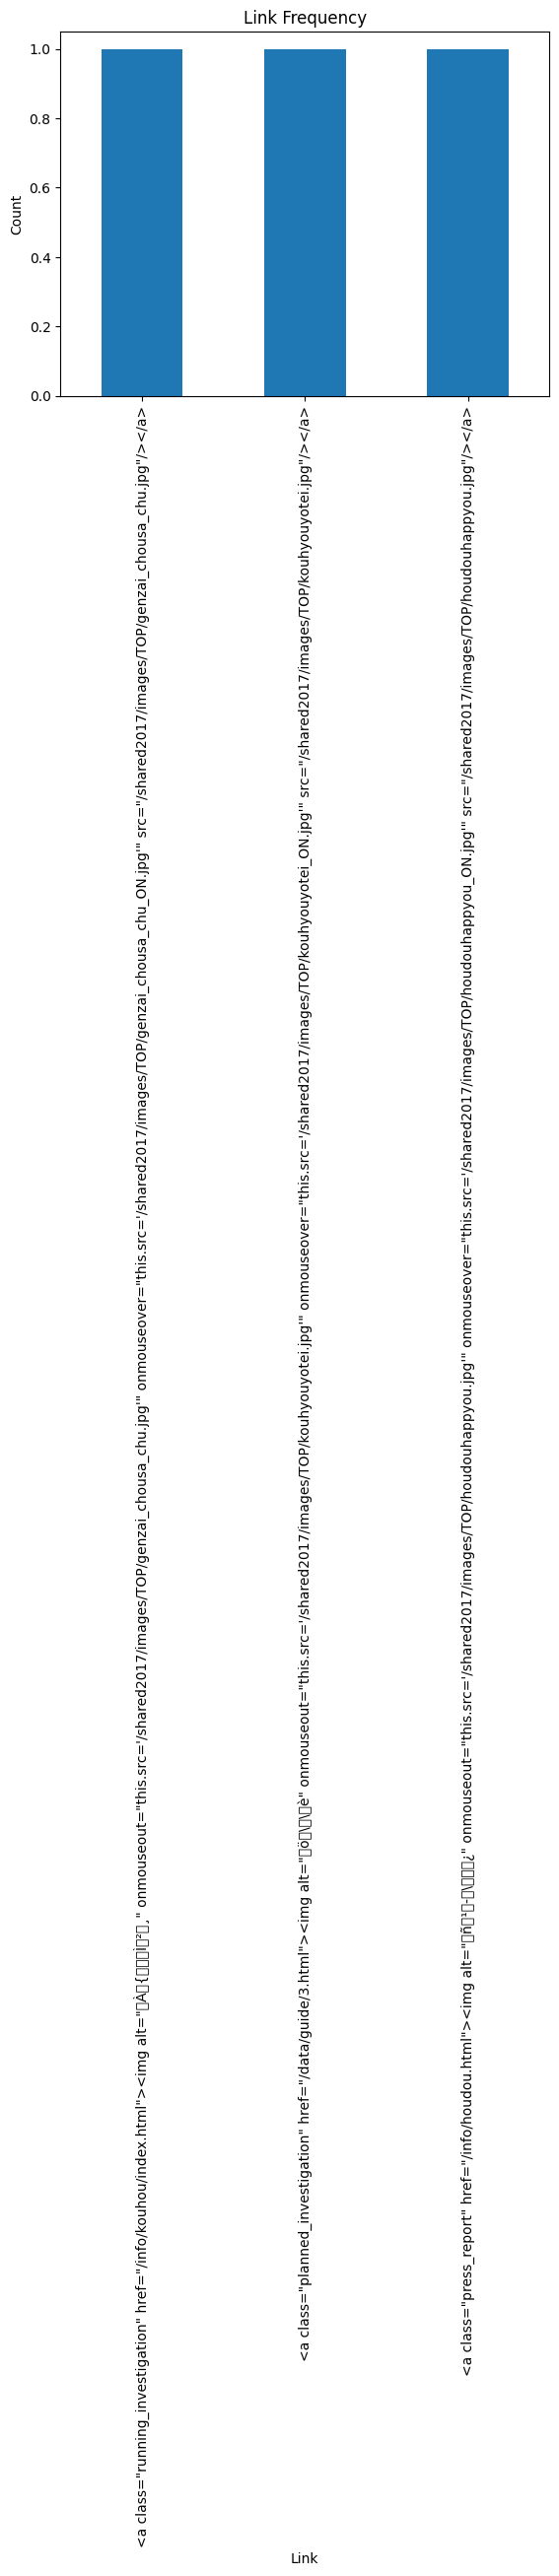

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# 例: リンクの出現頻度をカウントして棒グラフにする
# まずはデータフレームを作成
df = pd.read_csv('links.csv')

# リンクごとの出現回数をカウント
link_counts = df['Links'].value_counts()

# 棒グラフを作成
link_counts.plot(kind='bar')

# グラフのタイトルとラベルを設定
plt.title('Link Frequency')
plt.xlabel('Link')
plt.ylabel('Count')

# グラフを表示
plt.show()
